Testing the lower bound graph

In [1]:
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGenerator, ContactGraphGeneratorParams
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams
import logging
logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)
logging.getLogger("large_gcs.geometry.convex_set").setLevel(logging.INFO)
logger = logging.getLogger(__name__)
import numpy as np
import matplotlib.pyplot as plt


INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-05


100%|██████████| 3/3 [00:00<00:00, 183.91it/s]
INFO:large_gcs.graph.contact_graph:Loading 20 contact pair modes for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 192 sets...
100%|██████████| 192/192 [00:00<00:00, 2987.46it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 194/194 [00:00<00:00, 36298.12it/s]
INFO:large_gcs.graph.graph:Adding 194 vertices to graph...
100%|██████████| 194/194 [00:00<00:00, 45557.08it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 8349/8349 [00:00<00:00, 28119.63it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 8349/8349 [00:00<00:00, 17128.70it/s]
INFO:large_gcs.graph.graph:Adding 8349 edges to graph...
100%|██████████| 8349/8349 [00:00<00:00, 16076.74it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 12), n_vertices=194, n_edges=8349, source=[array([-2, -2]), array([2, 2])], target='regions

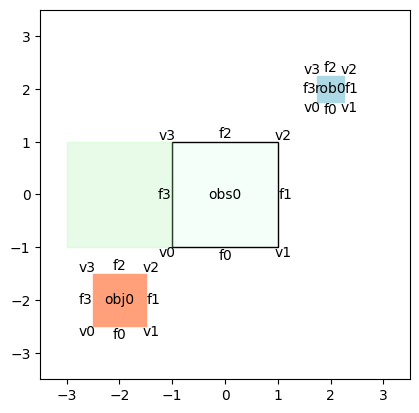

In [2]:
graph_name = "cg_simple_4_1"
graph_file = ContactGraphGeneratorParams.graph_file_path_from_name(
    graph_name
)
cg = ContactGraph.load_from_file(
    graph_file,
    should_use_l1_norm_vertex_cost=True,
)
source_vertex = cg.source
target_vertex = cg.target
cg.plot()

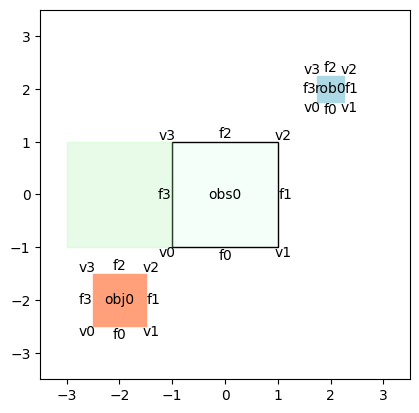

In [3]:
# New Source
from large_gcs.contact.contact_regions_set import ContactRegionsSet
from large_gcs.contact.contact_set import ContactPointSet
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.graph import Vertex

obj_pos = [[-2,-2]]
rob_pos = [[2,2]]
new_source_set = ContactPointSet("source", objects=cg.objects, robots=cg.robots, object_positions=obj_pos, robot_positions=rob_pos)
cg.source_pos = obj_pos + rob_pos
new_source_vertex=Vertex(new_source_set)
# New Target
contact_region_params = [ContactRegionParams(
    region_vertices=[[-3, -1], [-1, -1], [-1, 1], [-3, 1]],
    obj_indices=[0],)]
target_regions = [
    Polyhedron.from_vertices(params.region_vertices) for params in contact_region_params
]
cg.target_region_params = contact_region_params
cg.target_regions = target_regions
new_target_set = ContactRegionsSet(name="target", objects=cg.objects, robots=cg.robots, contact_region_params=contact_region_params)
new_target_vertex=Vertex(new_target_set)
cg.plot()


In [4]:
from large_gcs.graph.lower_bound_graph import LowerBoundGraph

lbg_graph_name = "cg_simple_4"
lbg=LowerBoundGraph.load_from_name(lbg_graph_name)

# lbg = LowerBoundGraph.generate_from_gcs(graph_name, cg)
lbg._graph = cg

In [5]:
lbg.update_lbg("source", new_source_vertex)
lbg.update_lbg("target", new_target_vertex)

DEBUG:large_gcs.graph.lower_bound_graph:Checking intersections with parent vertex
Processing batches: 100%|██████████| 194/194 [00:01<00:00, 171.86batch/s]
DEBUG:large_gcs.graph.lower_bound_graph:Checking intersections with parent vertex
Processing batches: 100%|██████████| 194/194 [00:00<00:00, 200.68batch/s]


In [27]:
from large_gcs.algorithms.ixg import IxG


ixg = IxG(cg, lbg, 10, None, False)
sol = ixg.run()

INFO:large_gcs.algorithms.ixg:Running IxG
DEBUG:large_gcs.graph.lower_bound_graph:Checking intersections with parent vertex
Processing batches: 100%|██████████| 194/194 [00:01<00:00, 174.24batch/s]
DEBUG:large_gcs.graph.lower_bound_graph:Checking intersections with parent vertex
Processing batches: 100%|██████████| 194/194 [00:01<00:00, 159.75batch/s]
INFO:large_gcs.algorithms.ixg:Updated LBG with source and target in 2.33 seconds
INFO:large_gcs.graph.lower_bound_graph:Finished Dijkstra in 2.594635248184204 seconds
INFO:large_gcs.graph.lower_bound_graph:duration in H:M:S 00:00:02
INFO:large_gcs.algorithms.ixg:iter: 0
n_vertices_expanded: {0: 1}, n_vertices_visited: {0: 0}, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_reexpanded: {0: 0}, n_vertices_revisited: {0: 0}, n_Q: 0, n_S: 0, n_S_pruned: 0, method_times: {},

In [7]:
# for v in cg.vertices:
#     print(v)
#     cg.generate_and_plot_samples_in_set(v, 20)

In [8]:
lbg._graph = cg


In [9]:
lbg._adjacency_list

defaultdict(list,
            {("('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'IC|obj0_f1-rob0_f3')",
              "('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f0-rob0_f2')",
              "('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'IC|obj0_f0-rob0_f2')"): [("('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'IC|obj0_f0-rob0_f2')",
               "('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f0-rob0_f2')",
               "('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'IC|obj0_f1-rob0_f3')"),
              ("('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'IC|obj0_f3-rob0_f1')",
               "('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f0-rob0_f2')",
               "('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'IC|obj0_f0-rob0_f2')"),
              ('', '', 'target')],
             ("('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'IC|obj0_f0-rob0_f2')",
              "('NC|obs0_f3-obj0_f1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f0-rob0_f2')",
              "('NC|obs0_f3

In [10]:
# construct adjacency list
# from copy import copy

# from tqdm import tqdm


# edges = copy(lbg._edges)
# lbg._edges = {}
# for (u, v), c in tqdm(edges.items(), total=len(edges)):
#     lbg.add_edge(u, v, c)

In [11]:
len([c for c in lbg._edges.values() if c>0])

284784

In [12]:
len([c for c in lbg._edges.values() if c==0])

561370

In [13]:
# for (u, v), c in lbg._edges.items():
#     if c == 0:
#         continue
#     print(f"{c}: {u} -> {v}")
#     pos_v = lbg._vertices[v].point
#     pos_u = lbg._vertices[u].point
#     cg.plot(show_source=False)
#     cg.robots[0].plot_at_position(pos_u, color="red")
#     cg.robots[0].plot_at_position(pos_v, color="blue")
#     plt.show()

In [14]:
# lbg.save_to_file(lbg.lbg_file_path)

In [15]:
lbg._parent_vertex_to_vertices["target"]

[('', '', 'target')]

In [16]:
source_vertex

Vertex(convex_set=<large_gcs.contact.contact_set.ContactPointSet object at 0x731d138b24d0>, costs=[], constraints=[], gcs_vertex=<pydrake.geometry.optimization.GraphOfConvexSets.Vertex object at 0x731d10d67170>)

In [17]:
lbg.update_lbg(parent_vertex_name="source", parent_vertex=source_vertex)
lbg.update_lbg(parent_vertex_name="target", parent_vertex=target_vertex)


DEBUG:large_gcs.graph.lower_bound_graph:Checking intersections with parent vertex
Processing batches: 100%|██████████| 194/194 [00:00<00:00, 212.44batch/s]
DEBUG:large_gcs.graph.lower_bound_graph:Checking intersections with parent vertex
Processing batches: 100%|██████████| 194/194 [00:01<00:00, 162.86batch/s]


In [18]:
lbg.run_dijkstra("target")

INFO:large_gcs.graph.lower_bound_graph:Finished Dijkstra in 2.6027185916900635 seconds
INFO:large_gcs.graph.lower_bound_graph:duration in H:M:S 00:00:02


In [19]:
len(lbg._g)

284786

In [20]:
# lbg._vertices[("","","source")]
# lbg.outgoing_edges(("","","source"))

In [21]:
# lbg._g

In [22]:
len(lbg._parent_vertex_to_vertices["target"])

2

In [23]:
lbg._parent_vertex_to_vertices["target"]

[('', '', 'target'), ('', '', 'target')]

In [24]:
# How many g values are greater than 0?
nonzero_cost_vertices = [(key,x) for (key,x) in lbg._g.items() if x > 0]
print(len(nonzero_cost_vertices))

280988


In [25]:
sorted_vertices = sorted(nonzero_cost_vertices, key=lambda x: x[1])

In [26]:
# sort vertices by cost
# 
# for v, c in sorted_vertices:
#     pos = lbg._vertices[v].point
#     cg.plot(show_source=False)
#     cg.robots[0].plot_at_position(pos)
    
#     print(lbg._vertices[v].point, c, v)
#     plt.show()
